#**Emissão de Co2 - Regressão Linear**

Projeto feito através do Crash Course de Inteligência Artificial ministrado pelo Diogo Cortiz. 

Link das aulas no youtube: https://youtu.be/Ze-Q6ZNWpco

Neste projeto, vamos treinar um modelo de regressão linear para predição de emissão de Co2

In [ ]:
# importando as bibliotecas
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# download do dataset
!pip3 install wget
!wget https://raw.githubusercontent.com/diogocortiz/Crash-Course-IA/master/RegressaoLinear/FuelConsumptionCo2.csv

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=bab184642d561d97093ce551d5d813a56872adf88d34efe0d5b2bc6abd5872ee
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
--2020-06-17 20:32:29--  https://raw.githubusercontent.com/diogocortiz/Crash-Course-IA/master/RegressaoLinear/FuelConsumptionCo2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/plain]
Saving to: ‘FuelConsumptionCo2.csv’

FuelConsumptionCo2. 100%[===================>]  70.93K  --.-KB/s    in 0.03s   

2020-06-17 20:32:29 (2.57 MB/s) - ‘FuelConsumptionCo2.csv’ saved [72629/72629]



## Análise Exploratória de Dados

In [ ]:
# importando o dataset
df = pd.read_csv('FuelConsumptionCo2.csv')

In [ ]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
# dimensões do DataFrame
print('DIMENSÕES DO DATAFRAME:')
print(f'Linhas: {df.shape[0]}')
print(f'Colunas: {df.shape[1]}')

DIMENSÕES DO DATAFRAME:
Linhas: 1067
Colunas: 13


In [ ]:
# informações sobre nossos datas, como por exemplo seu tipo(Dtype) e suas entradas não nulas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [ ]:
# checando a existência de dados NaN
df.isnull().values.any()

False

In [ ]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [ ]:
print(f'VALORES ÚNICOS:\n{df.nunique().sort_values()}')

VALORES ÚNICOS:
MODELYEAR                     1
FUELTYPE                      4
CYLINDERS                     7
VEHICLECLASS                 16
TRANSMISSION                 22
MAKE                         39
FUELCONSUMPTION_COMB_MPG     43
ENGINESIZE                   45
FUELCONSUMPTION_HWY         118
FUELCONSUMPTION_COMB        148
CO2EMISSIONS                159
FUELCONSUMPTION_CITY        167
MODEL                       663
dtype: int64


In [ ]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [ ]:
# selecionando as features
X =  df[['ENGINESIZE']]
y = df[['CO2EMISSIONS']]

In [ ]:
# dividir o dataset em dados de treinamento e dados de teste
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

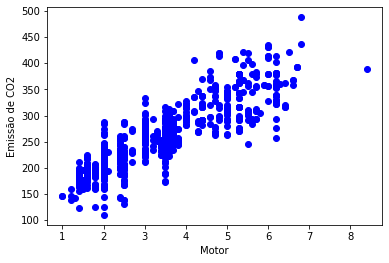

In [ ]:
plt.scatter(X_train, y_train, color='blue')
plt.xlabel("Motor")
plt.ylabel("Emissão de CO2")
plt.show()

In [ ]:
# vamos treinar o modelo de regressão linear
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# exibindo os coeficientes
print('(A) Intercepto: ', model.intercept_)
print('(B) Inclinação: ', model.coef_)

(A) Intercepto:  [126.28970217]
(B) Inclinação:  [[38.99297872]]


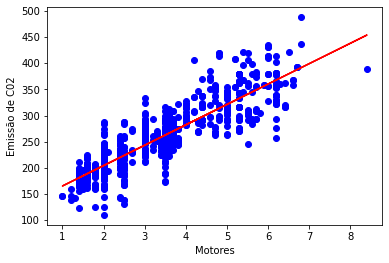

In [ ]:
# vamos exibir a nossa reta de regressão no dataset de treino
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, model.coef_[0][0]*X_train + model.intercept_[0], '-r')
plt.ylabel("Emissão de C02")
plt.xlabel("Motores")
plt.show()

In [ ]:
# vamos executar o nosso modelo no dataset de teste
# primeiro a gente tem que fazer as predições usando o modelo e base de teste
predicoesCo2 = model.predict(X_test)

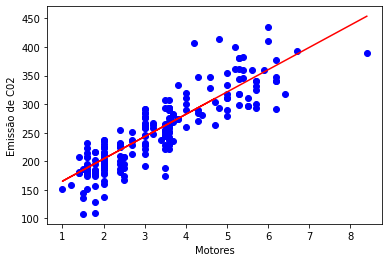

In [ ]:
# vamos exibir a nossa reta de regressão no dataset de teste
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, model.coef_[0][0]*X_test + model.intercept_[0], '-r')
plt.ylabel("Emissão de C02")
plt.xlabel("Motores")
plt.show()

In [ ]:
# vamos avaliar o modelo e mostrar as métricas
print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((predicoesCo2 - y_test)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(y_test, predicoesCo2))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(y_test, predicoesCo2))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % sqrt(mean_squared_error(y_test, predicoesCo2)))
print("R2-score: %.2f" % r2_score(predicoesCo2 , y_test) )

Soma dos Erros ao Quadrado (SSE): 210991 
Erro Quadrático Médio (MSE): 985.94
Erro Médio Absoluto (MAE): 24.10
Raiz do Erro Quadrático Médio (RMSE): 31.40 
R2-score: 0.68
